# Overhead experiment, various state sizes
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/17dd83dd193654dea32735d24d737a023734bb25 

In [29]:
import pandas as pd
from matplotlib import rcParams, rc
import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.ticker as mticker

# Add every font at the specified location
font_dir = ['.']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
rcParams['font.family'] = 'Verdana'
rcParams['figure.figsize'] = [11, 8]
rcParams['figure.dpi'] = 600 # 200 e.g. is really fine, but slower
import matplotlib.pyplot as plt

In [30]:
fiftykb_data = pd.read_csv("without_runtime/50KB_one_invocation.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fiftykb_data = fiftykb_data[fiftykb_data[column] < fiftykb_data[column].quantile(0.95)]
    
fiftykb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,4855.998895,4855.998895,0.027995,0.044431,0.009375,0.007077
std,2931.749959,2931.749959,0.003841,0.005002,0.001213,0.000803
min,0.000000,0.000000,0.022113,0.036609,0.007006,0.005328
25%,2261.750000,2261.750000,0.024817,0.040450,0.008327,0.006391
50%,4698.500000,4698.500000,0.027252,0.044055,0.009362,0.007024
75%,7530.250000,7530.250000,0.030613,0.047299,0.010381,0.007740
max,9996.000000,9996.000000,0.043820,0.064741,0.012495,0.008779


In [31]:
fivehundredkb_data = pd.read_csv("without_runtime/500KB_one_invocation.csv")

columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fivehundredkb_data = fivehundredkb_data[fivehundredkb_data[column] < fivehundredkb_data[column].quantile(0.95)]
    
fivehundredkb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000,8144.000000
mean,4815.465864,4815.465864,0.134899,0.046784,0.010434,0.008446
std,2749.327663,2749.327663,0.015121,0.005154,0.001076,0.000722
min,1.000000,1.000000,0.105155,0.038257,0.007875,0.006428
25%,2484.750000,2484.750000,0.124776,0.043288,0.009629,0.007908
50%,4749.500000,4749.500000,0.131716,0.045795,0.010358,0.008486
75%,7071.250000,7071.250000,0.140698,0.048968,0.011161,0.009002
max,9998.000000,9998.000000,0.196281,0.069166,0.013875,0.010008


In [32]:
fivemb_data = pd.read_csv("without_runtime/5MB_one_invocation.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fivemb_data = fivemb_data[fivemb_data[column] < fivemb_data[column].quantile(0.95)]
    
fivemb_data.describe()

,Unnamed: 0,REPETITION,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,4797.516026,4797.516026,6.291504,0.060367,0.014665,0.010481
std,2923.484989,2923.484989,1.597524,0.010653,0.002963,0.001034
min,0.000000,0.000000,3.204221,0.042845,0.009742,0.008033
25%,2226.500000,2226.500000,6.635776,0.053198,0.012412,0.009836
50%,4715.000000,4715.000000,6.902145,0.057454,0.014073,0.010403
75%,7342.500000,7342.500000,7.278304,0.066332,0.016462,0.010951
max,9999.000000,9999.000000,8.216450,0.090254,0.025436,0.014194


In [33]:
fiftymb_data = pd.read_csv("without_runtime/50MB_one_invocation.csv")

columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION"]

for column in columns:
    fiftymb_data = fiftymb_data[fiftymb_data[column] < fiftymb_data[column].quantile(0.95)]
    
fiftymb_data.describe()

fiftymb_data.std()

Unnamed: 0                      2884.746823
REPETITION                      2884.746823
STATE_SERIALIZATION_DURATION       3.205027
EVENT_SERIALIZATION_DURATION       0.006437
ROUTING_DURATION                   0.002207
ACTOR_CONSTRUCTION                 0.000467
dtype: float64

In [34]:
fiftykb_mean = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50KB")
fivehundredkb_mean = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="500KB")
fivemb_mean = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="5MB")
fiftymb_mean = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].mean().to_frame(name="50MB")


fiftykb_std = fiftykb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="50KB")
fivehundredkb_std = fivehundredkb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="500KB")
fivemb_std = fivemb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="5MB")
fiftymb_std = fiftymb_data[["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "EVENT_SERIALIZATION_DURATION", "STATE_SERIALIZATION_DURATION"]].std().to_frame(name="50MB")


overhead_mean = pd.concat([fiftykb_mean, fivehundredkb_mean, fivemb_mean, fiftymb_mean], axis=1)
overhead_std = pd.concat([fiftykb_std, fivehundredkb_std, fivemb_std, fiftymb_std], axis=1)
print(overhead_mean)
print(overhead_std)

                                  50KB     500KB       5MB       50MB
ACTOR_CONSTRUCTION            0.007077  0.008446  0.010481   0.009782
ROUTING_DURATION              0.009375  0.010434  0.014665   0.017146
EVENT_SERIALIZATION_DURATION  0.044431  0.046784  0.060367   0.060284
STATE_SERIALIZATION_DURATION  0.027995  0.134899  6.291504  88.250405
                                  50KB     500KB       5MB      50MB
ACTOR_CONSTRUCTION            0.000803  0.000722  0.001034  0.000467
ROUTING_DURATION              0.001213  0.001076  0.002963  0.002207
EVENT_SERIALIZATION_DURATION  0.005002  0.005154  0.010653  0.006437
STATE_SERIALIZATION_DURATION  0.003841  0.015121  1.597524  3.205027


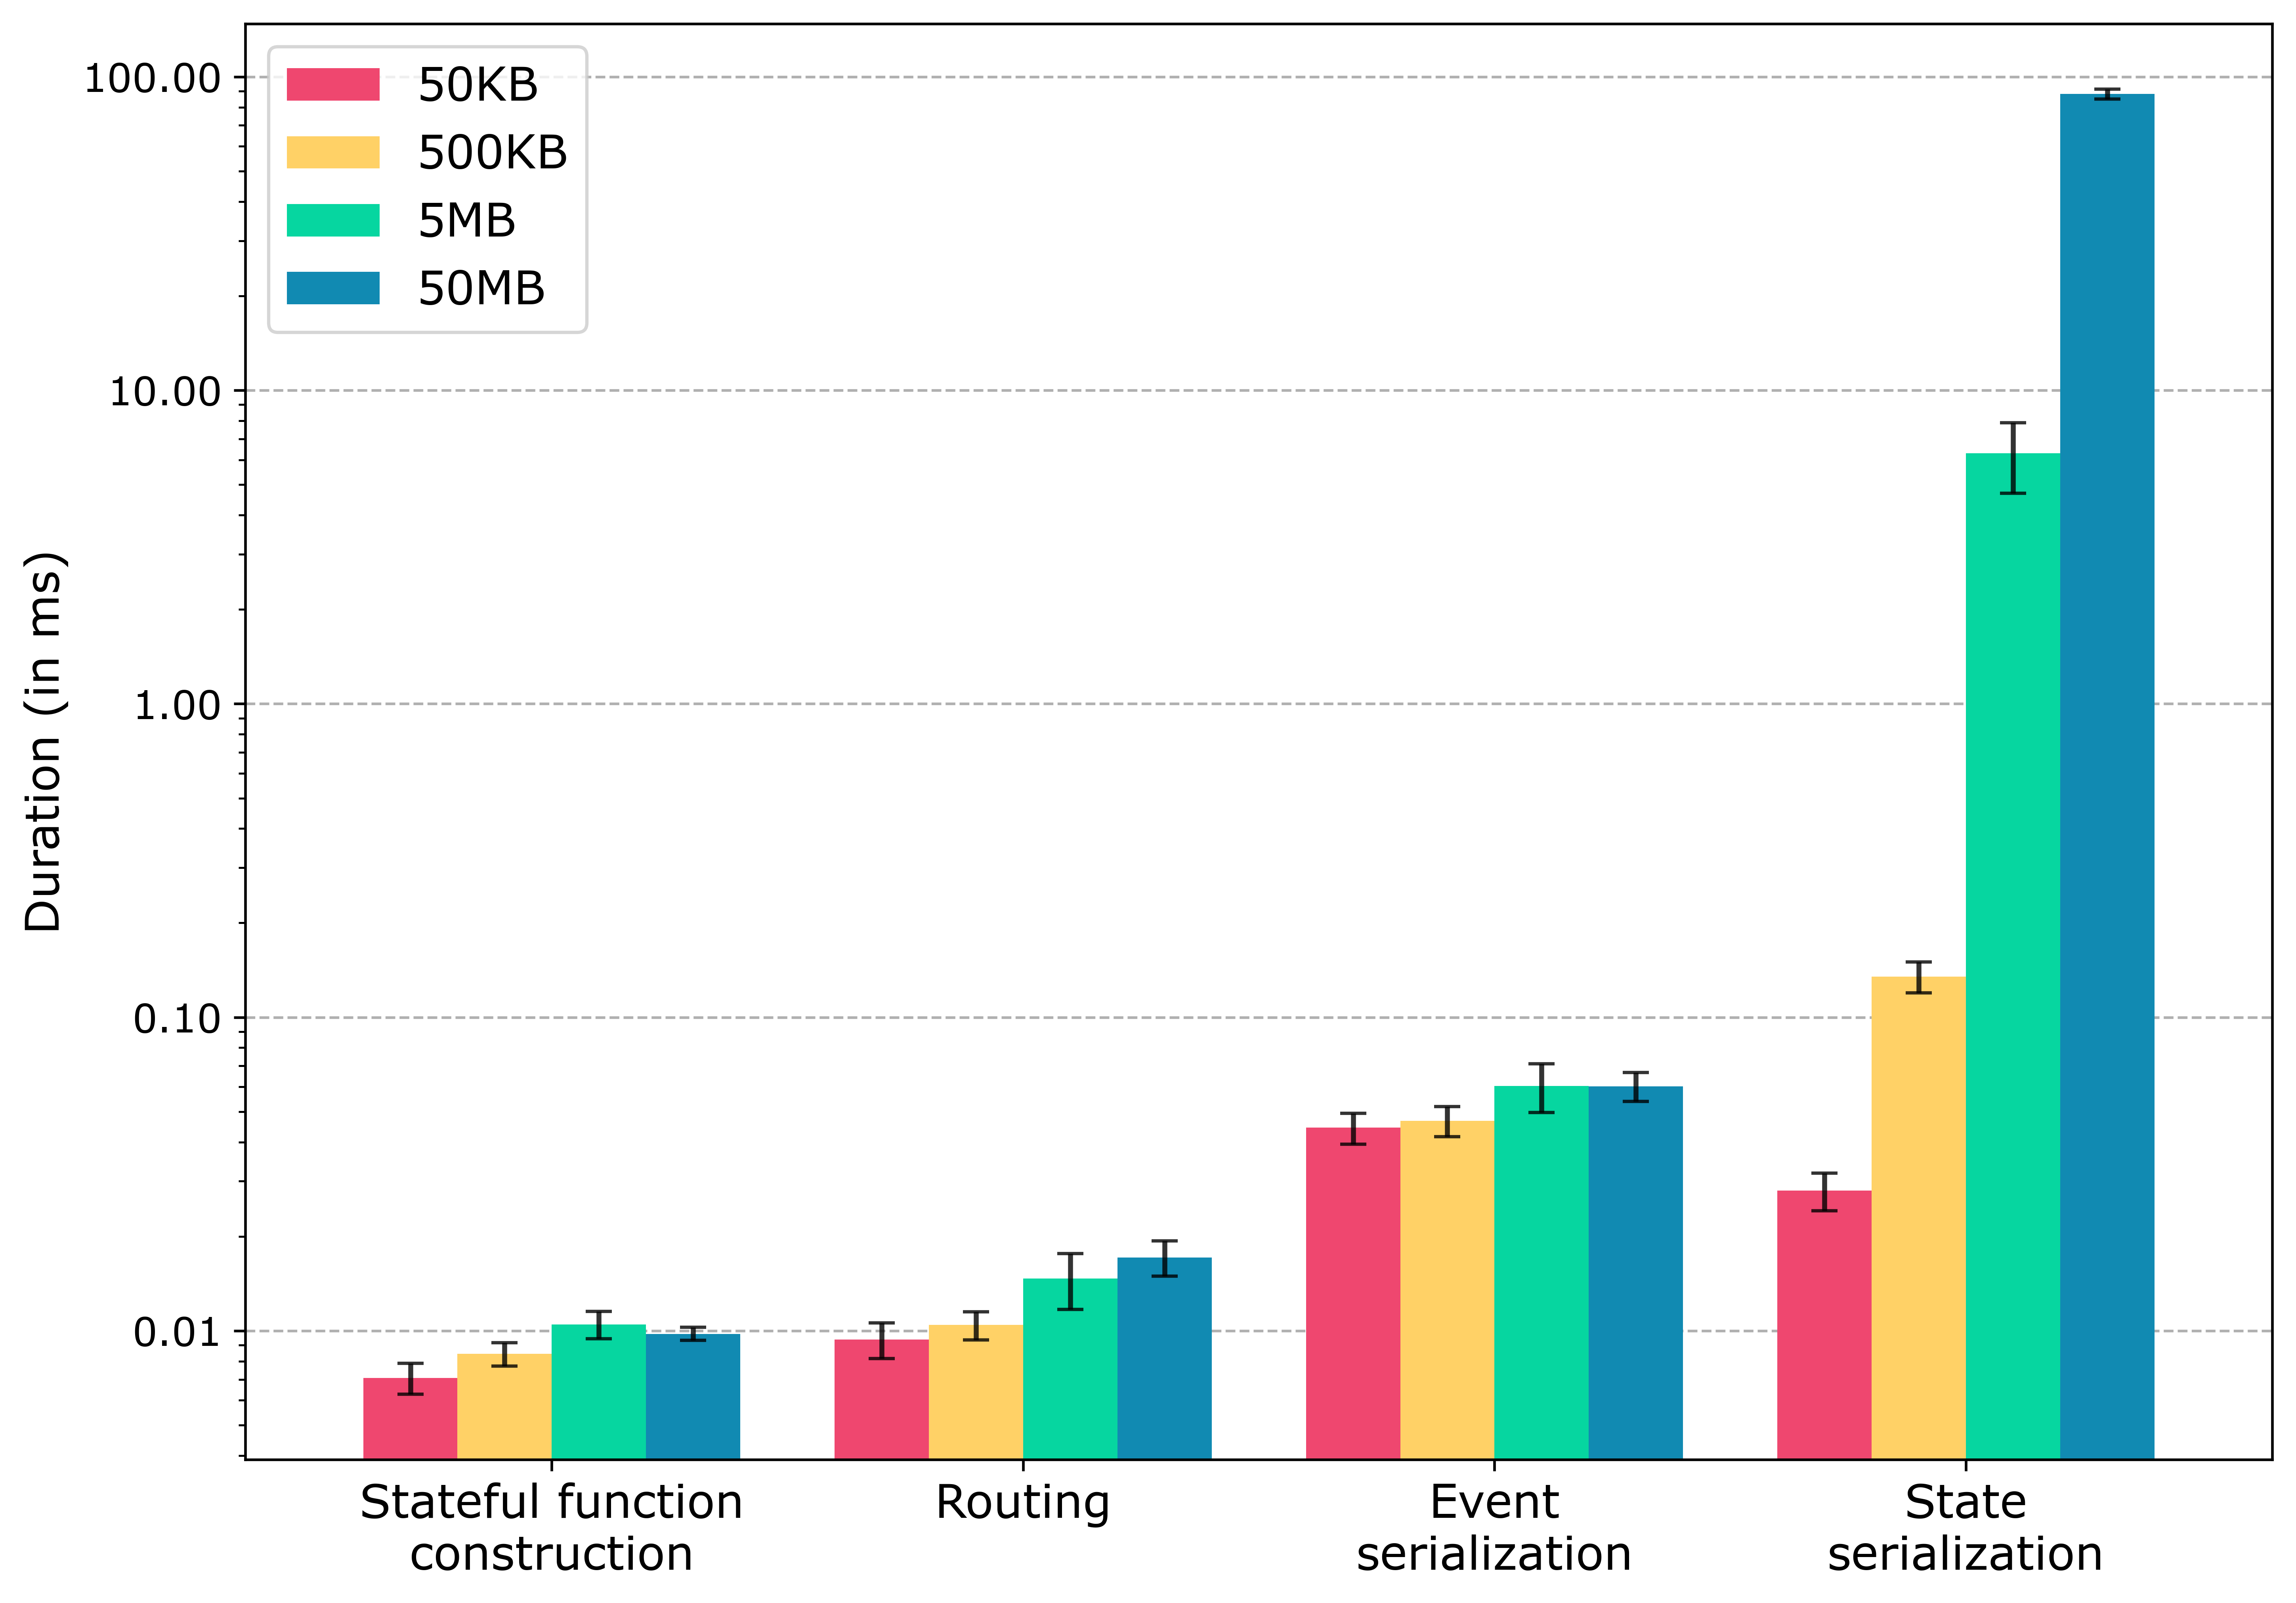

In [35]:
ax = overhead_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
plt.legend(loc=0, prop={"size": 14})
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "Event\nserialization", "State\nserialization"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("single_invocation_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

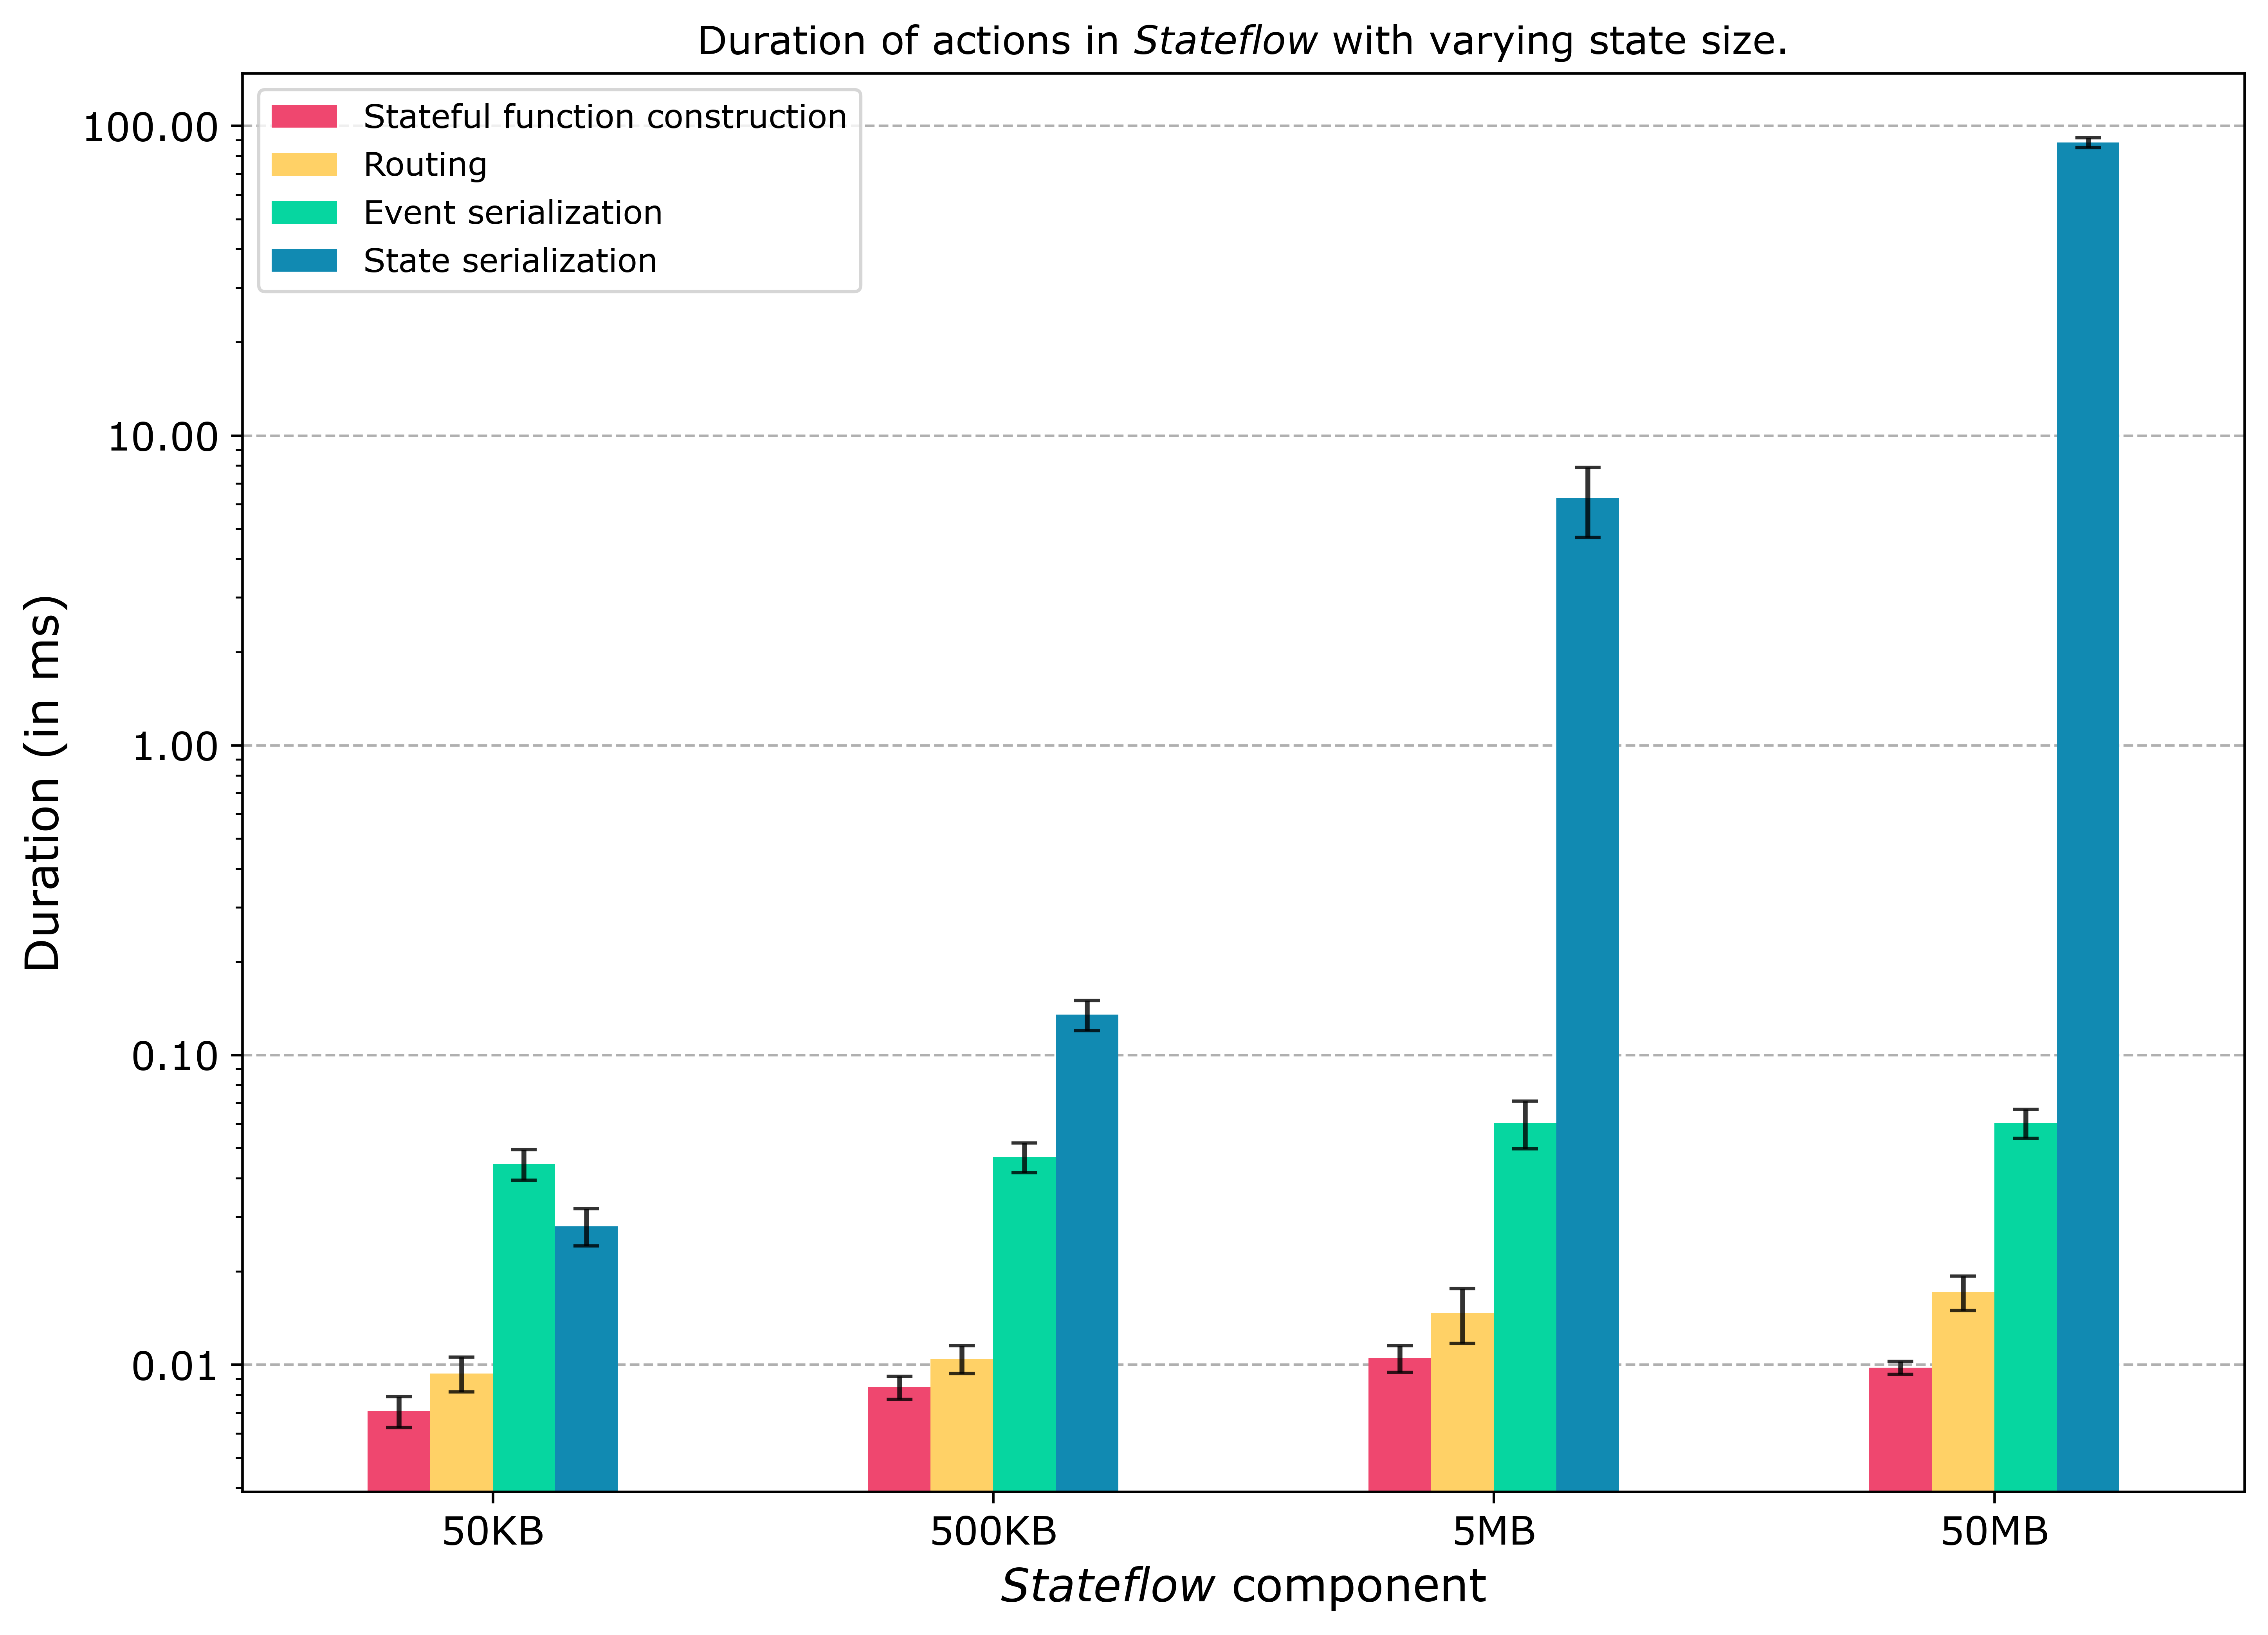

In [36]:
new_overhead = overhead_mean.rename({"ACTOR_CONSTRUCTION": "Stateful function construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()
new_std = overhead_std.rename({"ACTOR_CONSTRUCTION": "Stateful function construction", "ROUTING_DURATION": "Routing", "EVENT_SERIALIZATION_DURATION": "Event serialization", "STATE_SERIALIZATION_DURATION": "State serialization"}).transpose()

ax = new_overhead.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=new_std, rot=0, fontsize=12, capsize=4, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_title(r"Duration of actions in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.show()

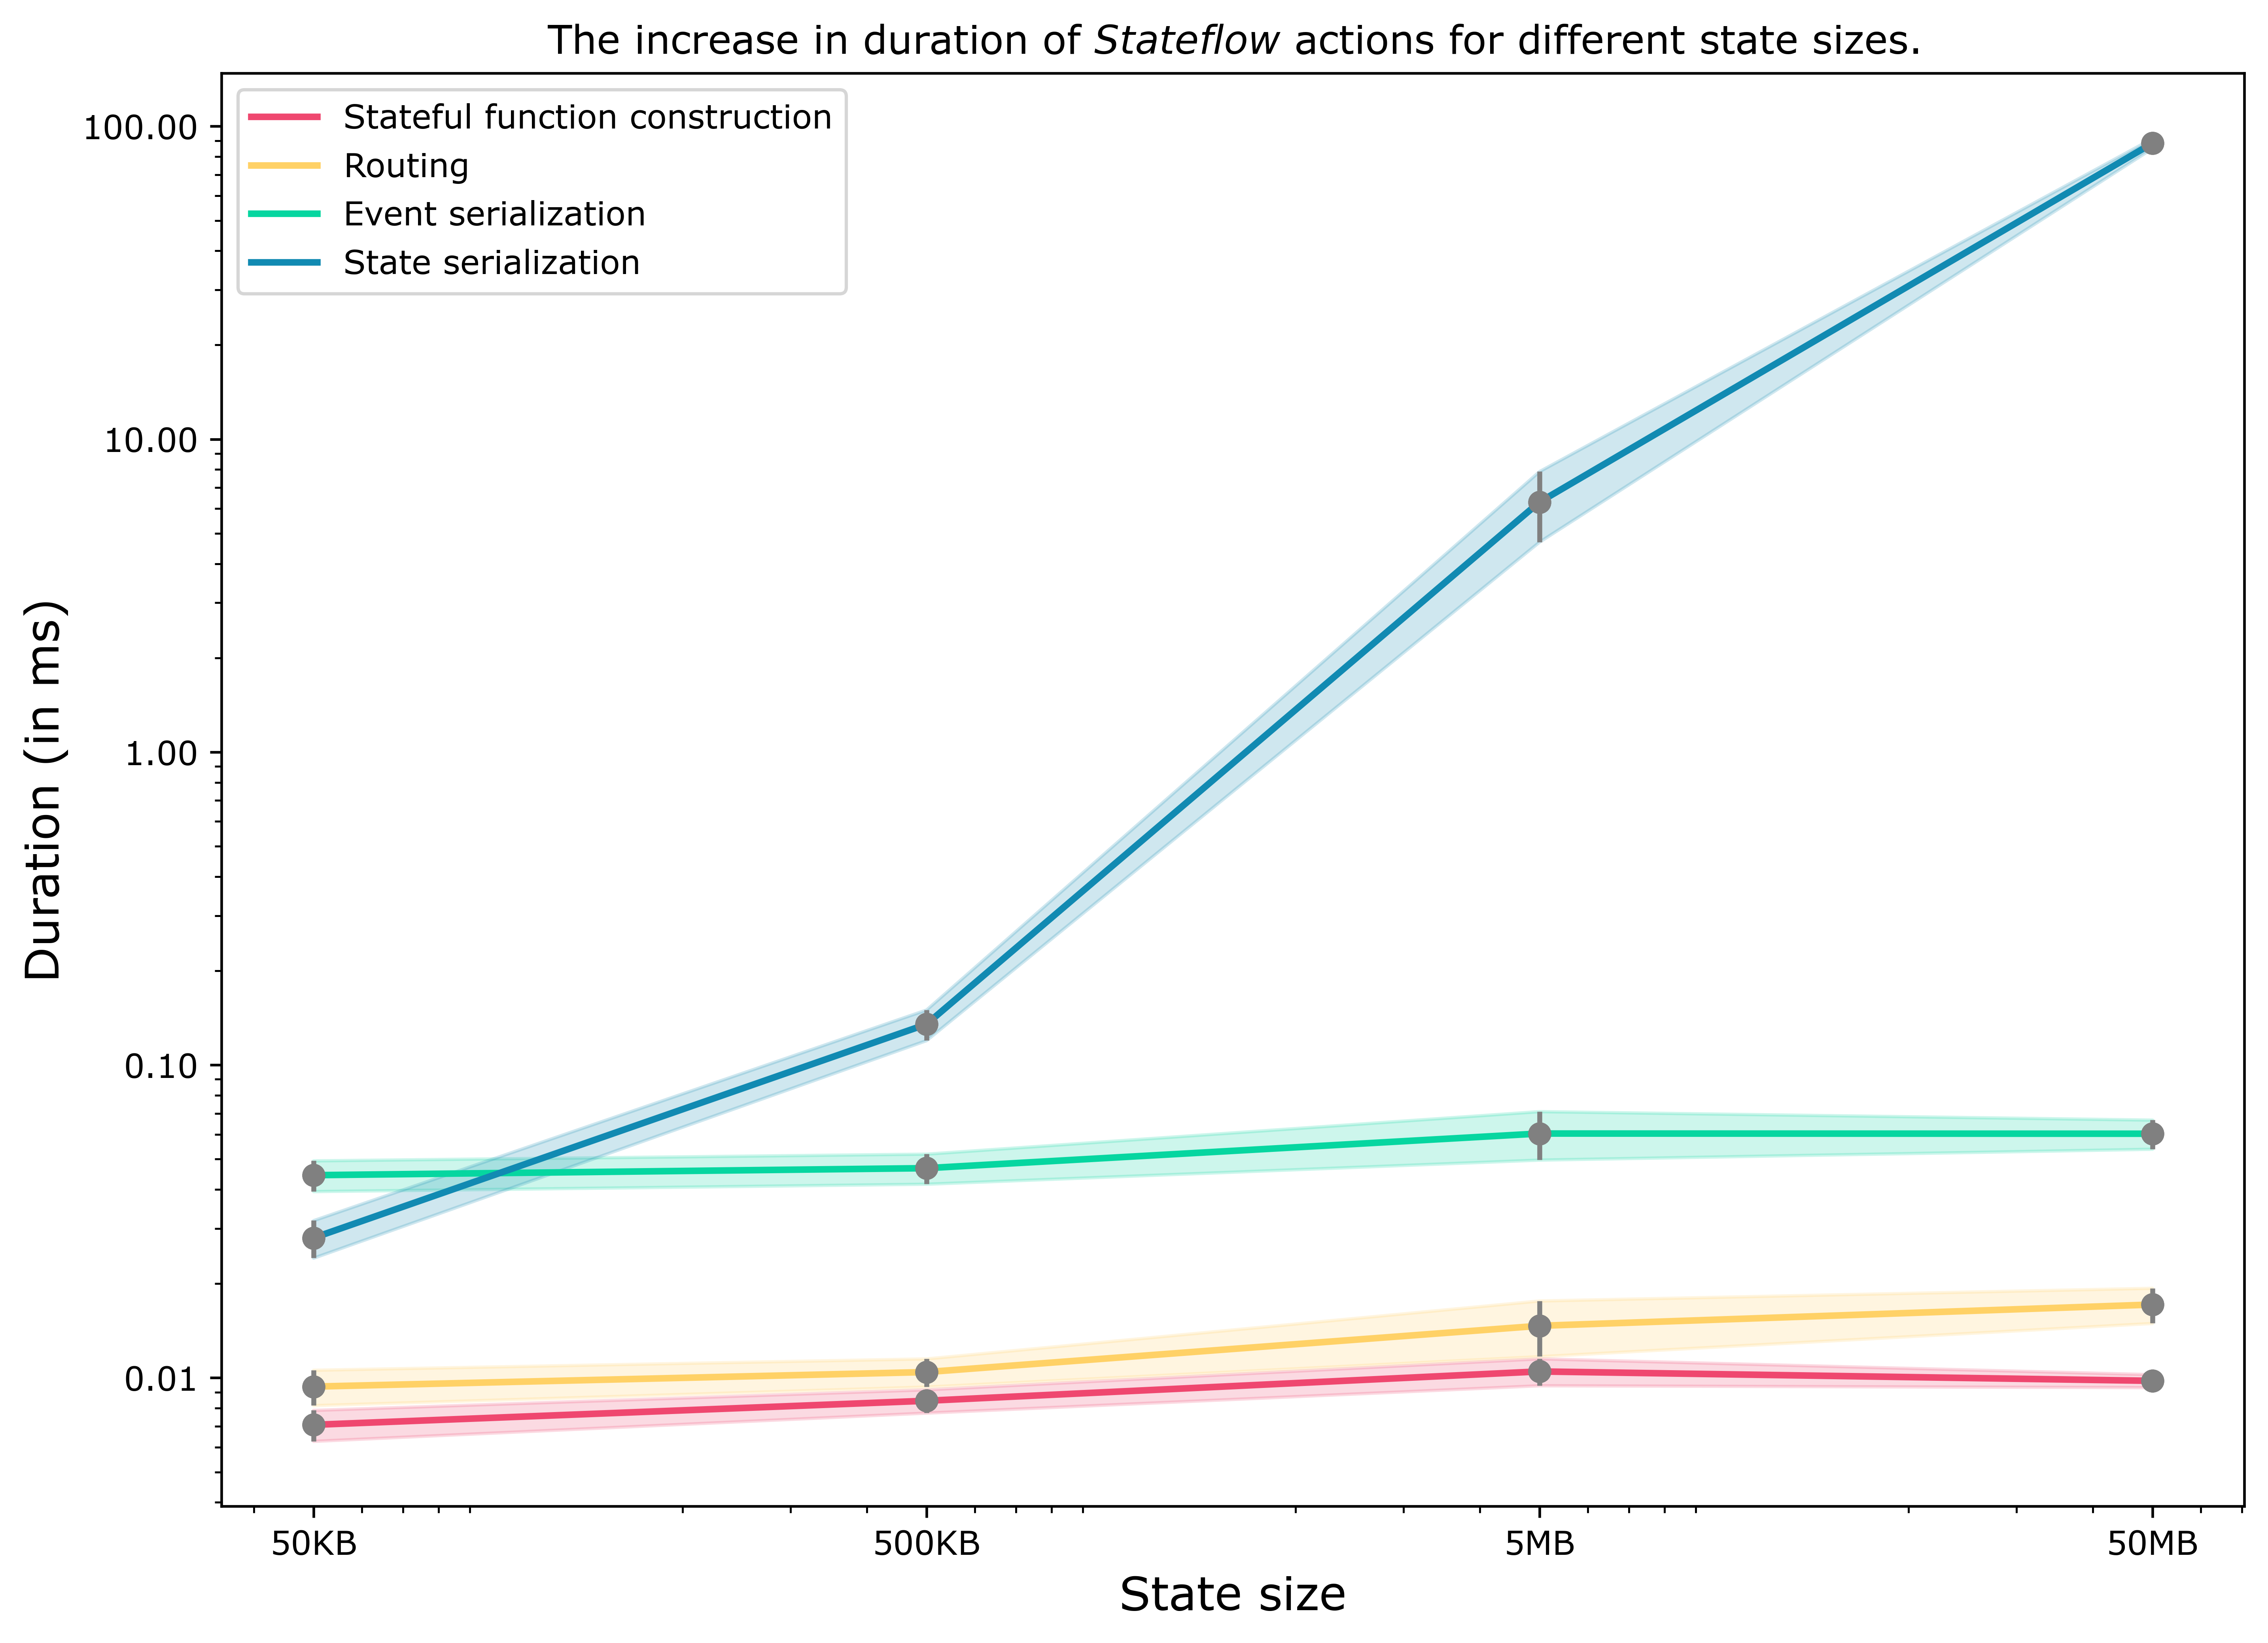

In [37]:
actor = overhead_mean.loc["ACTOR_CONSTRUCTION"]
route = overhead_mean.loc["ROUTING_DURATION"]
event = overhead_mean.loc["EVENT_SERIALIZATION_DURATION"]
state = overhead_mean.loc["STATE_SERIALIZATION_DURATION"]

actor_std = overhead_std.loc["ACTOR_CONSTRUCTION"]
route_std = overhead_std.loc["ROUTING_DURATION"]
event_std = overhead_std.loc["EVENT_SERIALIZATION_DURATION"]
state_std = overhead_std.loc["STATE_SERIALIZATION_DURATION"]

x = [50, 500, 5000, 50000]
plt.fill_between(x, actor-actor_std, actor+actor_std, color="#ef476f",  alpha=0.2)
plt.fill_between(x, route-route_std, route+route_std, color="#ffd166",   alpha=0.2)
plt.fill_between(x, event-event_std, event+event_std, color="#06d6a0",alpha=0.2)
plt.fill_between(x, state-state_std, state+state_std, color="#118ab2",alpha=0.2)

plt.plot(x, actor, color="#ef476f", label="Stateful function construction", linewidth=2)
plt.plot(x, route, color="#ffd166", label="Routing", linewidth=2)
plt.plot(x, event, color="#06d6a0", label="Event serialization", linewidth=2)
plt.plot(x, state, color="#118ab2", label="State serialization", linewidth=2)

plt.plot(x, actor, 'o', color="gray")
plt.plot(x, route, 'o', color="gray")
plt.plot(x, event,'o', color="gray")
plt.plot(x, state, 'o',color="gray")

plt.errorbar(x, actor, actor_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, route, route_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, event, event_std, linestyle="None", marker='o', color="gray")
plt.errorbar(x, state, state_std, linestyle="None", marker='o',color="gray")
ax = plt.gca()

plt.yscale('log')
plt.xscale('log')
plt.xticks(x, ["50KB", "500KB", "5MB", "50MB"])
plt.ylabel("Duration (in ms)",fontsize=14)
plt.xlabel("State size", fontsize=14)
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))

plt.legend()
plt.title(r"The increase in duration of $Stateflow$ actions for different state sizes.")
plt.show()


# Overhead experiment, various execution graph lengths, no interaction
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/b41816f9db2e497cdf4d0ee0e7168522166c2d68

In [38]:
eg_10_data = pd.read_csv("without_runtime/execution_graph_length_10.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_10_data = eg_10_data[eg_10_data[column] < eg_10_data[column].quantile(0.95)]
    
eg_10_data.describe()

,Unnamed: 0,REPETITION,STATE_SIZE,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,5016.182653,5016.182653,0.0,0.034947,0.099150,0.019751,0.008313,0.083266
std,2940.483661,2940.483661,0.0,0.007711,0.015943,0.004020,0.001364,0.009427
min,1.000000,1.000000,0.0,0.023543,0.074568,0.013370,0.005758,0.069833
25%,2413.750000,2413.750000,0.0,0.029263,0.087194,0.016990,0.007365,0.076639
50%,5059.500000,5059.500000,0.0,0.033750,0.095250,0.019085,0.008259,0.080741
75%,7620.250000,7620.250000,0.0,0.038621,0.108532,0.021580,0.008984,0.087623
max,9999.000000,9999.000000,0.0,0.058718,0.144785,0.032237,0.012270,0.112318


In [39]:
eg_100_data = pd.read_csv("without_runtime/execution_graph_length_100.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_100_data = eg_100_data[eg_100_data[column] < eg_100_data[column].quantile(0.95)]
    
eg_100_data.describe()

,Unnamed: 0,REPETITION,EXECUTION_GRAPH_LENGTH,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,4831.380300,4831.380300,100.0,0.032674,0.328653,0.018977,0.008226,0.566395
std,2984.279609,2984.279609,0.0,0.004921,0.032645,0.002089,0.000944,0.029237
min,0.000000,0.000000,100.0,0.024713,0.271733,0.014308,0.006021,0.527597
25%,2105.750000,2105.750000,100.0,0.028017,0.302008,0.017024,0.007366,0.545551
50%,4891.500000,4891.500000,100.0,0.033022,0.326799,0.019131,0.008469,0.557457
75%,7321.250000,7321.250000,100.0,0.035720,0.343011,0.020512,0.008976,0.576727
max,9994.000000,9994.000000,100.0,0.054512,0.451741,0.027685,0.010196,0.668859


In [40]:
eg_500_data = pd.read_csv("without_runtime/execution_graph_length_500.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_500_data = eg_500_data[eg_500_data[column] < eg_500_data[column].quantile(0.95)]
    
eg_500_data.describe()

,Unnamed: 0,REPETITION,EXECUTION_GRAPH_LENGTH,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,4943.869571,4943.869571,500.0,0.041008,1.388304,0.024511,0.009902,2.835875
std,2919.167122,2919.167122,0.0,0.006856,0.216333,0.003283,0.000814,0.204334
min,0.000000,0.000000,500.0,0.028407,1.046736,0.018586,0.008002,2.522866
25%,2313.750000,2313.750000,500.0,0.036308,1.201536,0.022343,0.009364,2.684813
50%,4959.000000,4959.000000,500.0,0.040014,1.354067,0.024092,0.009772,2.769721
75%,7464.250000,7464.250000,500.0,0.044618,1.517765,0.025823,0.010237,2.943676
max,9999.000000,9999.000000,500.0,0.063847,2.259266,0.038387,0.013067,3.412858


In [41]:
eg_1000_data = pd.read_csv("without_runtime/execution_graph_length_1000.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    eg_1000_data = eg_1000_data[eg_1000_data[column] < eg_1000_data[column].quantile(0.95)]
eg_1000_data.describe()

,Unnamed: 0,REPETITION,EXECUTION_GRAPH_LENGTH,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,4898.685496,4898.685496,1000.0,0.042010,2.836532,0.025650,0.009163,5.664233
std,2834.483101,2834.483101,0.0,0.004422,0.283636,0.001767,0.000553,0.322871
min,0.000000,0.000000,1000.0,0.032452,2.204680,0.021586,0.007683,5.129661
25%,2447.750000,2447.750000,1000.0,0.038967,2.663427,0.024374,0.008797,5.423365
50%,4879.500000,4879.500000,1000.0,0.041746,2.770845,0.025534,0.009070,5.569930
75%,7357.500000,7357.500000,1000.0,0.044352,2.965030,0.026652,0.009414,5.842699
max,9998.000000,9998.000000,1000.0,0.060115,5.110580,0.034537,0.011781,6.622155


In [42]:
columns = ["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]

eg_10_data_mean = eg_10_data[columns].mean().to_frame(name="10 nodes")
eg_100_data_mean = eg_100_data[columns].mean().to_frame(name="100 nodes")
eg_500_data_mean = eg_500_data[columns].mean().to_frame(name="500 nodes")
eg_1000_data_mean = eg_1000_data[columns].mean().to_frame(name="1000 nodes")

eg_10_data_std = eg_10_data[columns].std().to_frame(name="10 nodes")
eg_100_data_std = eg_100_data[columns].std().to_frame(name="100 nodes")
eg_500_data_std = eg_500_data[columns].std().to_frame(name="500 nodes")
eg_1000_data_std = eg_1000_data[columns].std().to_frame(name="1000 nodes")


overhead_eg_mean = pd.concat([eg_10_data_mean, eg_100_data_mean, eg_500_data_mean, eg_1000_data_mean], axis=1)
overhead_eg_std = pd.concat([eg_10_data_std, eg_100_data_std, eg_500_data_std, eg_1000_data_std], axis=1)
print(overhead_eg_mean)
print(overhead_eg_std)

                              10 nodes  100 nodes  500 nodes  1000 nodes
ACTOR_CONSTRUCTION            0.008313   0.008226   0.009902    0.009163
ROUTING_DURATION              0.019751   0.018977   0.024511    0.025650
STATE_SERIALIZATION_DURATION  0.034947   0.032674   0.041008    0.042010
EVENT_SERIALIZATION_DURATION  0.099150   0.328653   1.388304    2.836532
EXECUTION_GRAPH_TRAVERSAL     0.083266   0.566395   2.835875    5.664233
                              10 nodes  100 nodes  500 nodes  1000 nodes
ACTOR_CONSTRUCTION            0.001364   0.000944   0.000814    0.000553
ROUTING_DURATION              0.004020   0.002089   0.003283    0.001767
STATE_SERIALIZATION_DURATION  0.007711   0.004921   0.006856    0.004422
EVENT_SERIALIZATION_DURATION  0.015943   0.032645   0.216333    0.283636
EXECUTION_GRAPH_TRAVERSAL     0.009427   0.029237   0.204334    0.322871


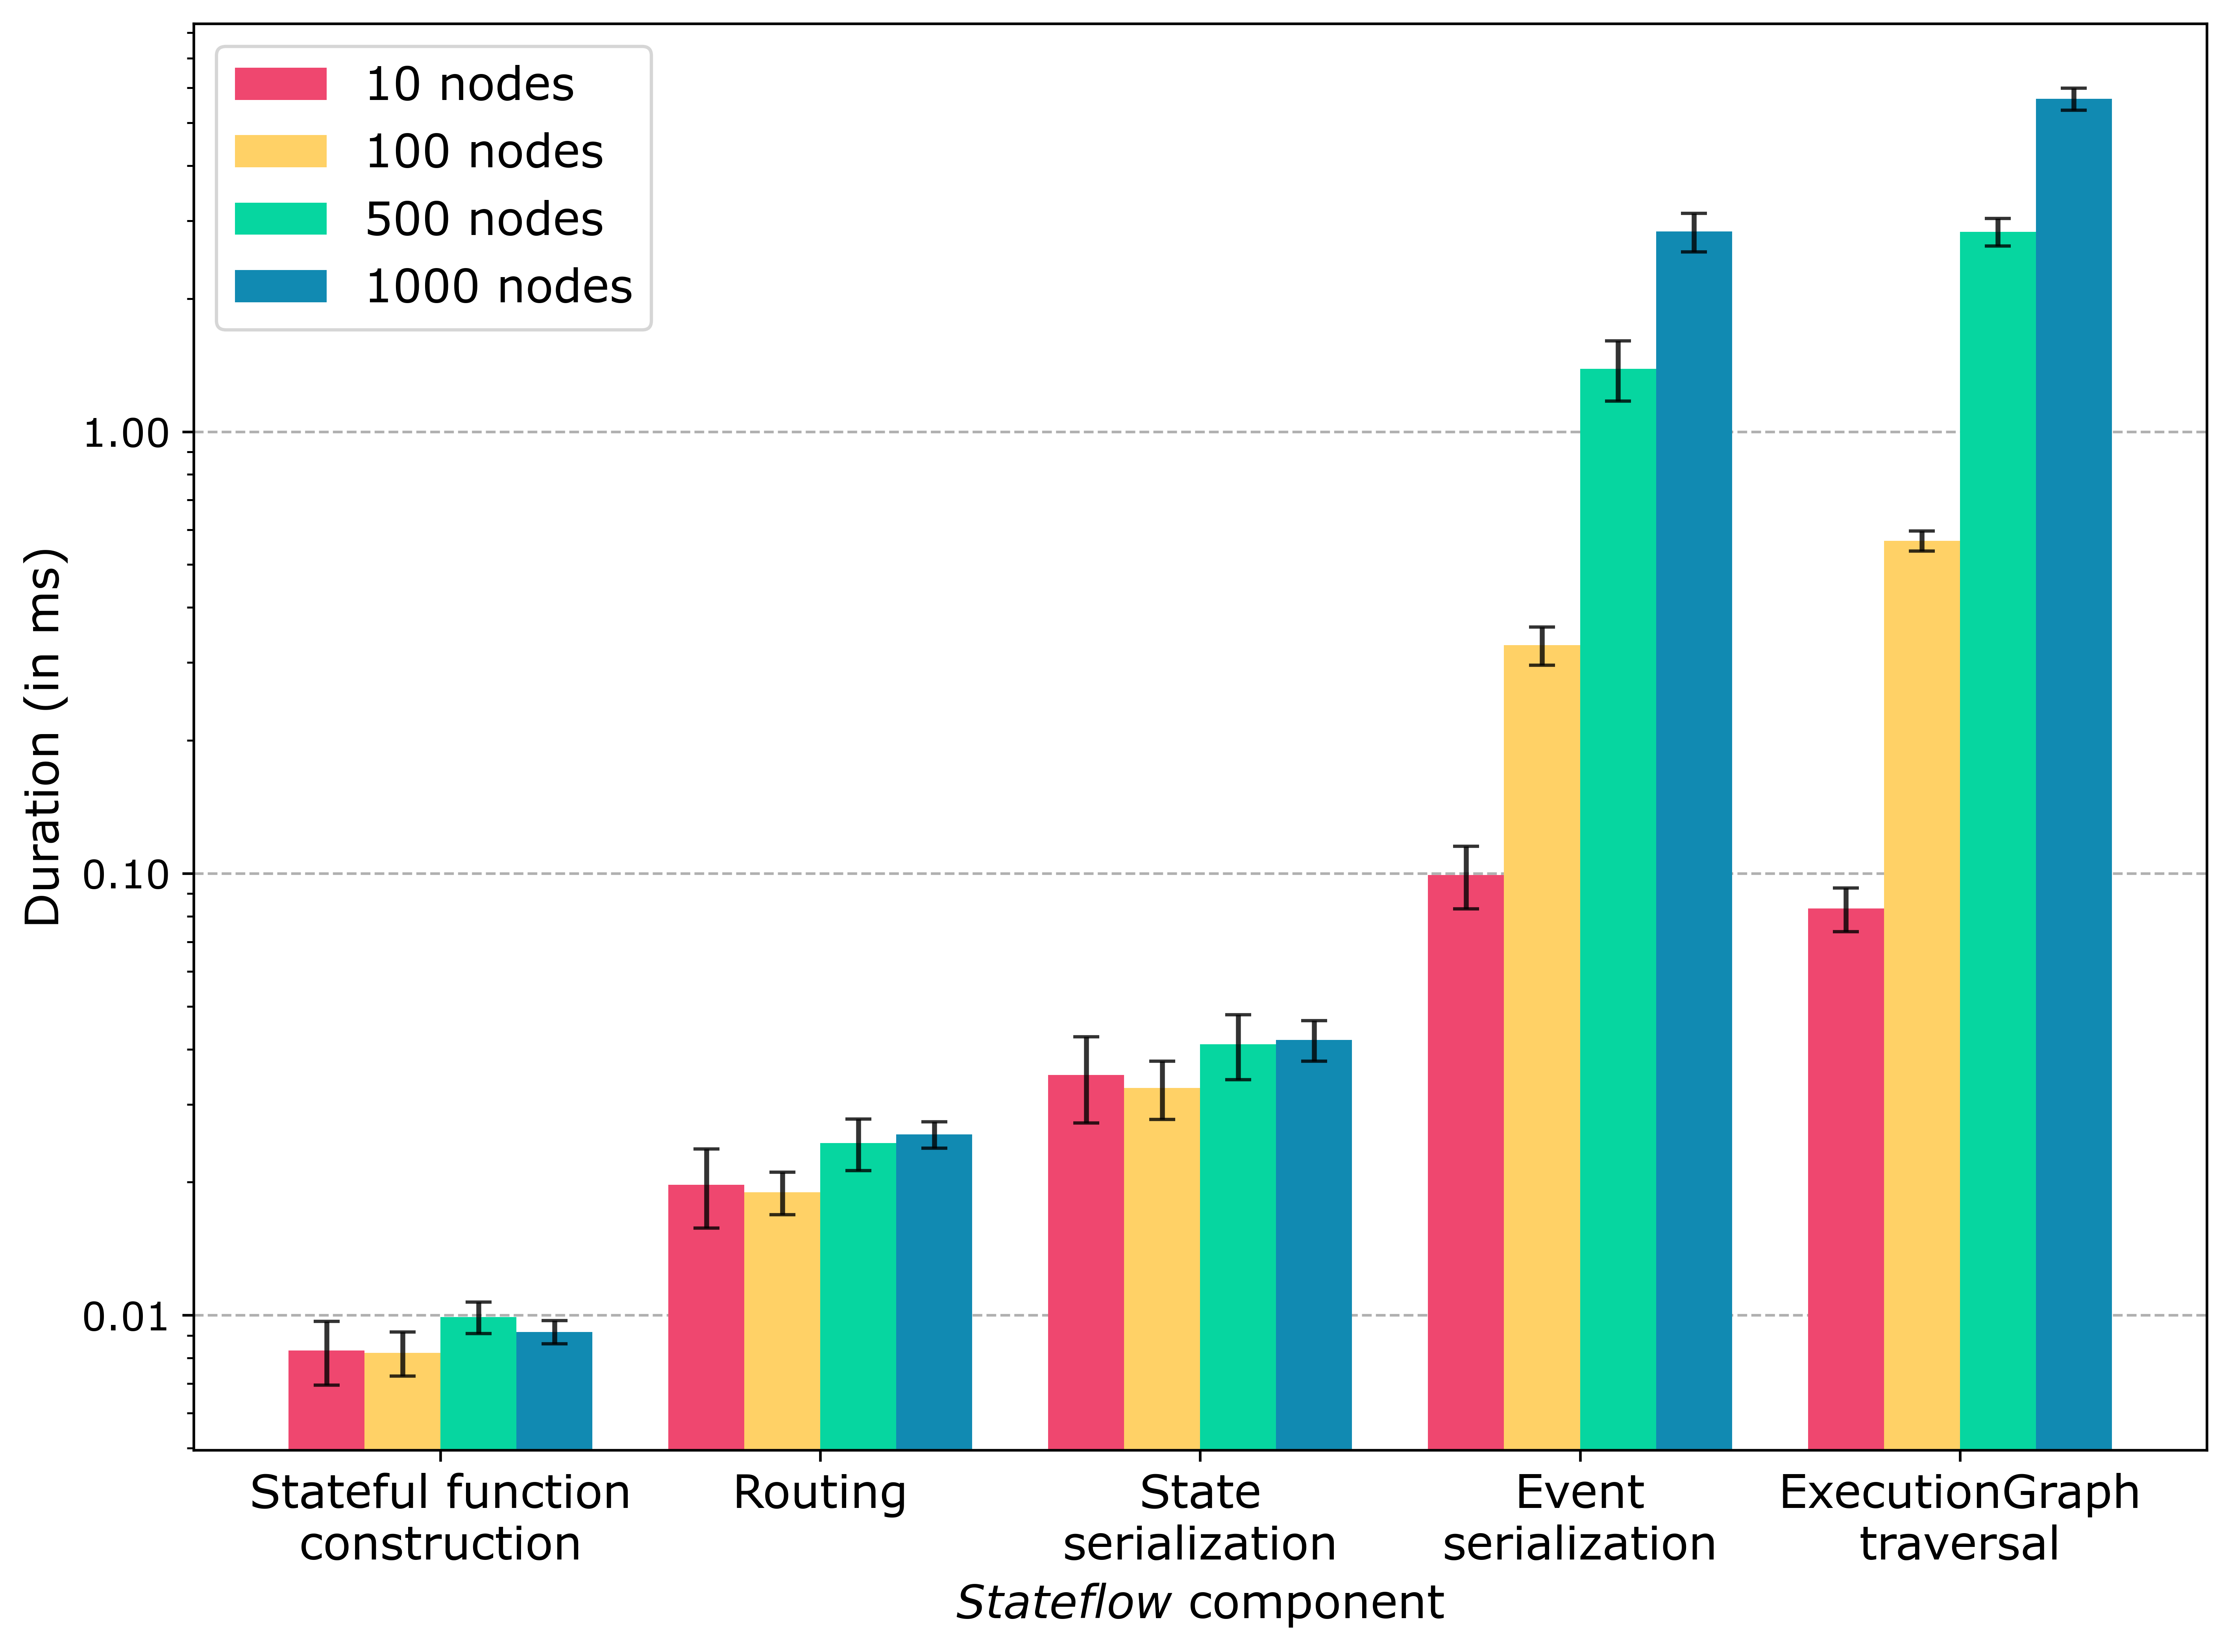

In [43]:
ax = overhead_eg_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_eg_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
ax.set_yscale('log')
plt.legend(loc=0, prop={"size": 14})
ax.set_ylabel("Duration (in ms)", fontsize=14)
ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "State\nserialization", "Event\nserialization", "ExecutionGraph\ntraversal"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("execution_graph_overhead.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

# Overhead experiment, various interaction sizes, fixed execution graph size
Results are obtained via code commit: https://github.com/wzorgdrager/stateful_dataflows/commit/d765bd7fc27a1ddd13f422f44f5ae141a288bdbc 

In [44]:
in_5_data = pd.read_csv("without_runtime/interactions_5.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_5_data = in_5_data[in_5_data[column] < in_5_data[column].quantile(0.95)]
    
in_5_data.describe()

,Unnamed: 0,REPETITION,INTERACTIONS,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,4892.858454,4892.858454,5.0,0.290274,1.424669,0.110582,0.071994,1.635270
std,2641.073370,2641.073370,0.0,0.021278,0.068884,0.009252,0.006035,0.058872
min,37.000000,37.000000,5.0,0.255331,1.318185,0.097905,0.064412,1.542358
25%,2669.750000,2669.750000,5.0,0.274490,1.370777,0.103617,0.068044,1.589524
50%,4811.000000,4811.000000,5.0,0.285444,1.409471,0.107052,0.069440,1.624401
75%,7107.250000,7107.250000,5.0,0.301380,1.463761,0.116688,0.073383,1.672087
max,9999.000000,9999.000000,5.0,0.401200,1.673507,0.139566,0.090597,1.793731


In [45]:
in_10_data = pd.read_csv("without_runtime/interactions_10.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_10_data = in_10_data[in_10_data[column] < in_10_data[column].quantile(0.95)]
    
in_10_data.describe()

,Unnamed: 0,REPETITION,INTERACTIONS,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,772.000000,772.000000,772.0,772.000000,772.000000,772.000000,772.000000,772.000000
mean,554.516839,554.516839,10.0,0.536409,3.208776,0.203827,0.127218,3.266055
std,260.829553,260.829553,0.0,0.029184,0.108263,0.012187,0.008568,0.091655
min,1.000000,1.000000,10.0,0.490558,3.011270,0.187113,0.116908,3.072874
25%,329.750000,329.750000,10.0,0.514992,3.124393,0.193321,0.120519,3.195281
50%,551.500000,551.500000,10.0,0.531634,3.193698,0.201185,0.123759,3.254900
75%,783.250000,783.250000,10.0,0.551784,3.269300,0.211433,0.133686,3.338082
max,999.000000,999.000000,10.0,0.678455,3.609069,0.240725,0.153707,3.468546


In [46]:
in_15_data = pd.read_csv("without_runtime/interactions_15.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_15_data = in_15_data[in_15_data[column] < in_15_data[column].quantile(0.95)]
    
in_15_data.describe()

,Unnamed: 0,REPETITION,INTERACTIONS,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,4707.186143,4707.186143,15.0,0.854426,5.790295,0.302540,0.207422,5.030112
std,2886.997496,2886.997496,0.0,0.055203,0.239880,0.024022,0.016696,0.162041
min,0.000000,0.000000,15.0,0.740610,5.323526,0.262880,0.180795,4.646293
25%,2315.750000,2315.750000,15.0,0.816152,5.622428,0.284794,0.193735,4.909838
50%,4461.500000,4461.500000,15.0,0.844915,5.751365,0.297398,0.204152,5.014534
75%,6867.250000,6867.250000,15.0,0.881975,5.912073,0.315236,0.217504,5.136990
max,9999.000000,9999.000000,15.0,1.172897,6.786491,0.386754,0.257979,5.436607


In [47]:
in_20_data = pd.read_csv("without_runtime/interactions_20.csv")
columns = ["STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "ROUTING_DURATION", "ACTOR_CONSTRUCTION", "EXECUTION_GRAPH_TRAVERSAL"]

for column in columns:
    in_20_data = in_20_data[in_20_data[column] < in_20_data[column].quantile(0.95)]
    
in_20_data.describe()

,Unnamed: 0,REPETITION,INTERACTIONS,STATE_SERIALIZATION_DURATION,EVENT_SERIALIZATION_DURATION,ROUTING_DURATION,ACTOR_CONSTRUCTION,EXECUTION_GRAPH_TRAVERSAL
count,7736.000000,7736.000000,7736.0,7736.000000,7736.000000,7736.000000,7736.000000,7736.000000
mean,4686.827172,4686.827172,20.0,1.115019,8.489762,0.408602,0.258279,6.716189
std,2824.432453,2824.432453,0.0,0.067115,0.315969,0.027752,0.019701,0.183728
min,0.000000,0.000000,20.0,0.986523,7.854847,0.362166,0.226956,6.298197
25%,2287.750000,2287.750000,20.0,1.069547,8.272665,0.388424,0.243093,6.582843
50%,4432.500000,4432.500000,20.0,1.101205,8.426637,0.402950,0.254260,6.687915
75%,7035.250000,7035.250000,20.0,1.142972,8.621864,0.421991,0.268952,6.827236
max,9999.000000,9999.000000,20.0,1.469314,9.918698,0.514472,0.325189,7.226459


In [48]:
columns = ["ACTOR_CONSTRUCTION", "ROUTING_DURATION", "STATE_SERIALIZATION_DURATION", "EVENT_SERIALIZATION_DURATION", "EXECUTION_GRAPH_TRAVERSAL"]

in_5_data_mean = in_5_data[columns].mean().to_frame(name="5 interactions")
in_10_data_mean = in_10_data[columns].mean().to_frame(name="10 interactions")
in_15_data_mean = in_15_data[columns].mean().to_frame(name="15 interactions")
in_20_data_mean = in_20_data[columns].mean().to_frame(name="20 interactions")

in_5_data_std = in_5_data[columns].std().to_frame(name="5 interactions")
in_10_data_std = in_10_data[columns].std().to_frame(name="10 interactions")
in_15_data_std = in_15_data[columns].std().to_frame(name="15 interactions")
in_20_data_std = in_20_data[columns].std().to_frame(name="20 interactions")
#eg_500_data_std = eg_500_data[columns].std().to_frame(name="500 nodes")
#eg_1000_data_std = eg_1000_data[columns].std().to_frame(name="1000 nodes")


overhead_in_mean = pd.concat([in_5_data_mean, in_10_data_mean, in_15_data_mean, in_20_data_mean], axis=1)
overhead_in_std = pd.concat([in_5_data_std,in_10_data_std, in_15_data_std, in_20_data_std], axis=1)
print(overhead_in_mean)
print(overhead_in_std)

                              5 interactions  10 interactions  \
ACTOR_CONSTRUCTION                  0.071994         0.127218   
ROUTING_DURATION                    0.110582         0.203827   
STATE_SERIALIZATION_DURATION        0.290274         0.536409   
EVENT_SERIALIZATION_DURATION        1.424669         3.208776   
EXECUTION_GRAPH_TRAVERSAL           1.635270         3.266055   

                              15 interactions  20 interactions  
ACTOR_CONSTRUCTION                   0.207422         0.258279  
ROUTING_DURATION                     0.302540         0.408602  
STATE_SERIALIZATION_DURATION         0.854426         1.115019  
EVENT_SERIALIZATION_DURATION         5.790295         8.489762  
EXECUTION_GRAPH_TRAVERSAL            5.030112         6.716189  
                              5 interactions  10 interactions  \
ACTOR_CONSTRUCTION                  0.006035         0.008568   
ROUTING_DURATION                    0.009252         0.012187   
STATE_SERIALIZATION_DURA

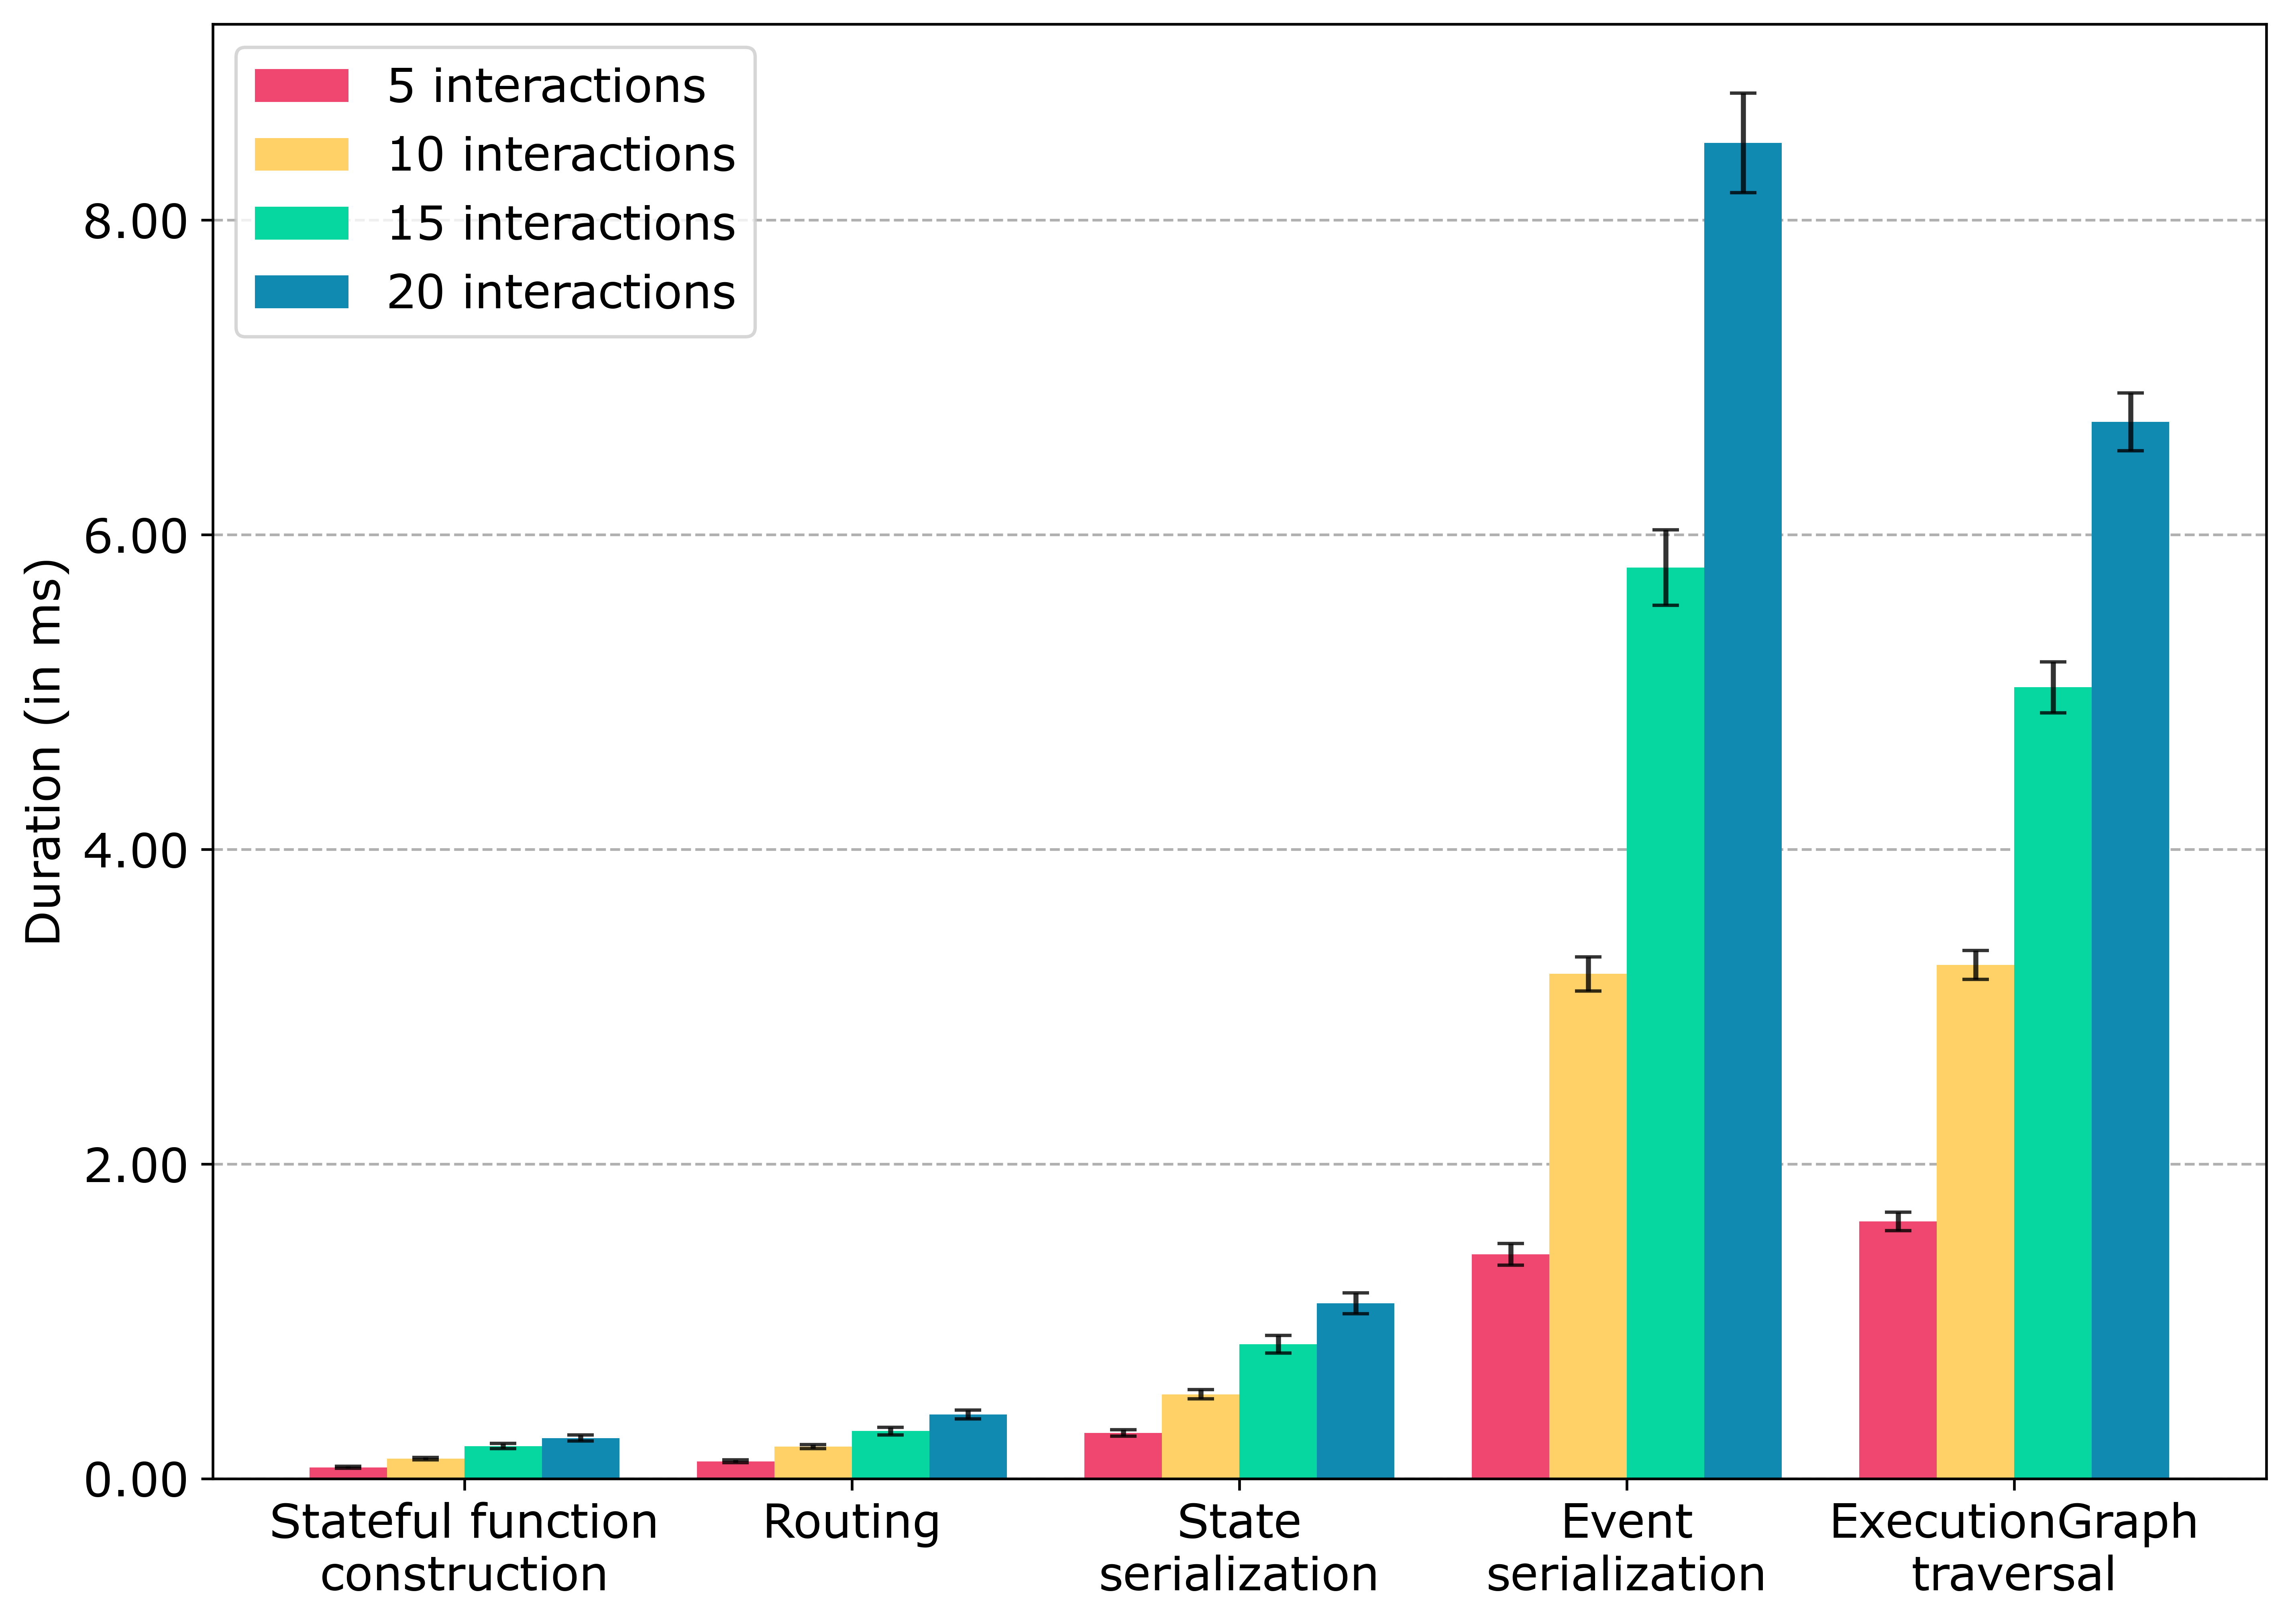

In [49]:
ax = overhead_in_mean.plot(kind="bar", color=["#ef476f", "#ffd166", "#06d6a0", "#118ab2", "#073b4c"], yerr=overhead_in_std, rot=0, fontsize=12, capsize=4, width=0.8, ecolor='black', error_kw={"alpha": 0.80})
ax.set_axisbelow(True)
plt.grid(axis="y", linestyle="--")
plt.legend(loc=0, prop={"size": 14})
#ax.set_yscale('log')
ax.set_ylabel("Duration (in ms)", fontsize=14)
#ax.set_xlabel(r"$Stateflow$ " + "component", fontsize=14)
plt.yticks(fontsize=14)
ax.set_xticklabels(["Stateful function\nconstruction", "Routing", "State\nserialization", "Event\nserialization", "ExecutionGraph\ntraversal"], fontsize=14)
#ax.set_title(r"Duration of components in $Stateflow$ with varying state size. ")
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.2f'))
plt.savefig("interaction_overhead.pdf", bbox_inches = 'tight', pad_inches = 0)